# SUPERMARKET SALES

##  Duomenų įsikėlimas ir tvarkymas

In [245]:
import pandas as pd
import numpy as np

In [246]:
df = pd.read_csv('supermarket_sales.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [247]:
pd.DataFrame({'min':df.min(), 'max':df.max()})

,min,max
Invoice ID,101-17-6199,898-04-2717
Branch,A,C
City,Mandalay,Yangon
Customer type,Member,Normal
Gender,Female,Male
Product line,Electronic accessories,Sports and travel
Unit price,10.08,99.96
Quantity,1,10
Tax 5%,0.5085,49.65
Total,10.6785,1042.65


In [248]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [249]:
#Patikrinu, ar nėra dublikatų:
df.duplicated().sum()

0

In [250]:
#Pavadinimų stulpeliuose pakeičiu tarpus apatiniu brūkšniu:
df.columns = df.columns.str.replace(' ', '_')

In [251]:
#Ties data pakeičiu 'object' duomenų tipą į datos:
df['Date'] = pd.to_datetime(df['Date']).dt.date.astype('datetime64[ns]')
df['Time'] = pd.to_datetime(df['Time'])

In [252]:
#Sukuriu stulpelį su apispirkimų valandomis:
df['Hour'] = df['Time'].dt.hour  

In [253]:
#Sukuriu stulpelį su mėnesiais:
df['Month'] = df['Date'].dt.month

In [254]:
#Perkonvertuoju mėnesius į mėnesių pavadinimus :
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [255]:
# Sukuriu stulpelį su savaitės dienomis :
df["day_of_week"] = df["Date"].dt.day_name()

In [256]:
# Patikrinu ar kiekvienas Branch tikrai turi tik po vieną priskirtą miestą:
branch_city = df.groupby('Branch')['City'].agg(['unique'])
branch_city

,unique
Branch,
A,[Yangon]
B,[Mandalay]
C,[Naypyitaw]


In [257]:
#Sukuriu stulpelį su pardavimais po mokesčių:
df['sales'] = df['Total'] - df['Tax_5%']

In [258]:
# Duomenų bazėje klaidingi COGS, tad sukuriu random maržas ir išskaičiuoju naujus COGS ir gross income:

from random import uniform

df["gross_margin_percentage"] = [round(uniform(0, 35), 2) for i in range(len(df))]
df["gross_income"] = (df["sales"] * (df["gross_margin_percentage"] / 100)).round(2)
df["cogs"] = df["sales"] - df["gross_income"]

In [259]:
df[['sales', "gross_margin_percentage", "gross_income", "cogs"]]

,sales,gross_margin_percentage,gross_income,cogs
0,522.83,25.16,131.54,391.29
1,76.40,32.31,24.68,51.72
2,324.31,14.44,46.83,277.48
3,465.76,24.04,111.97,353.79
4,604.17,34.94,211.10,393.07
...,...,...,...,...
995,40.35,18.80,7.59,32.76
996,973.80,26.42,257.28,716.52
997,31.84,32.90,10.48,21.36
998,65.82,5.30,3.49,62.33


In [260]:
#Patikslinant stulpelius, pervadinu 'Total' į 'sales_with_tax'
df.columns = ['sales_with_tax' if x=='Total' else x for x in df.columns]

In [261]:
#Patikrinu duomenis:
df.info()
df.head(5).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product_line             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5%                   1000 non-null   float64       
 9   sales_with_tax           1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

,0,1,2,3,4
Invoice_ID,750-67-8428,226-31-3081,631-41-3108,123-19-1176,373-73-7910
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer_type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product_line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Unit_price,74.69,15.28,46.33,58.22,86.31
Quantity,7,5,7,8,7
Tax_5%,26.1415,3.82,16.2155,23.288,30.2085
sales_with_tax,548.9715,80.22,340.5255,489.048,634.3785


## Analizė

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

### Klientai ir jų apipirkimų tendencijos

Moterys ar vyrai apispirkinėja dažniau? Su naryste ar be?

In [263]:
cu_type_gender = df.groupby(["Customer_type", "Gender"]).size()
cu_type_gender.unstack()

Gender,Female,Male
Customer_type,,
Member,261,240
Normal,240,259


Text(0, 0.5, 'Transactions')

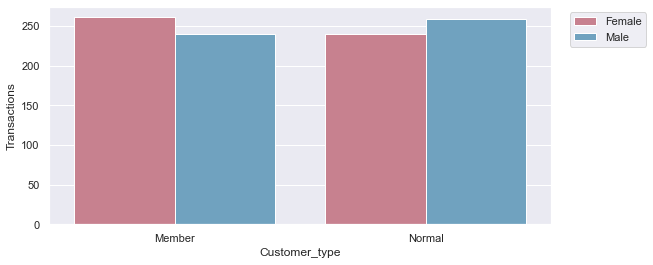

In [264]:
ctg_plot = sns.countplot(
    x="Customer_type", hue="Gender", data=df, palette=["#d27688", "#63a6cc"]
)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
ctg_plot.set_ylabel("Transactions")

Kurios kategorijos labiau paklausios tarp moterų, o kurios tarp vyrų?

In [265]:
products_gender = df.groupby(["Product_line", "Gender"]).size()
products_gender.unstack()

Gender,Female,Male
Product_line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


Text(0, 0.5, 'Transactions')

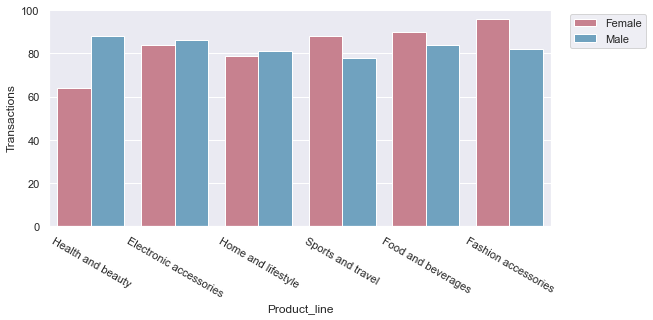

In [266]:
pg_plot = sns.countplot(
    x="Product_line", hue="Gender", data=df, palette=["#d27688", "#63a6cc"]
)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
pg_plot.set_xticklabels(pg_plot.get_xticklabels(), rotation=330)
pg_plot.set_ylabel("Transactions")

Ar yra įtaka tarp išleidžamos sumos per apsipirkimą ir klientų lyties?

In [267]:
def q1(x):
    return x.quantile(0.25)


def q3(x):
    return x.quantile(0.75)

In [268]:
sales_by_gender = df.groupby("Gender").agg({"sales": ["min", q1, "median", q3, "max"]})
sales_by_gender

sales                              
          min      q1 median      q3    max
Gender                                     
Female  12.09  126.44  259.6  463.28  993.0
Male    10.17  112.33  232.6  435.08  989.8

Text(0, 0.5, 'Transaction value')

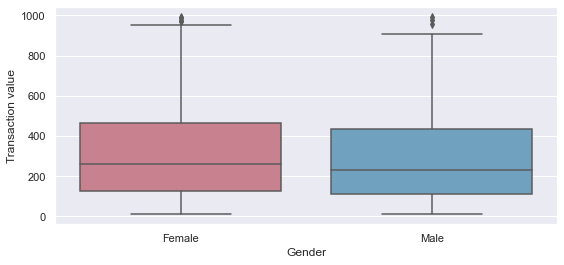

In [269]:
sbg_plot = sns.boxplot(x=df["Gender"], y=df["sales"], palette=["#d27688", "#63a6cc"])
sbg_plot.set_ylabel("Transaction value")

Koks parduotuvių tinklo narių ir nenarių krepšelių dydžio rodiklis?

In [270]:
customer_type_basket = df[["Customer_type", "Quantity"]]
cus_type_grp = customer_type_basket.groupby("Customer_type", as_index=False).mean().round(2)
cus_type_grp

,Customer_type,Quantity
0,Member,5.56
1,Normal,5.46


[Text(0, 0, '5.56'), Text(0, 0, '5.46')]

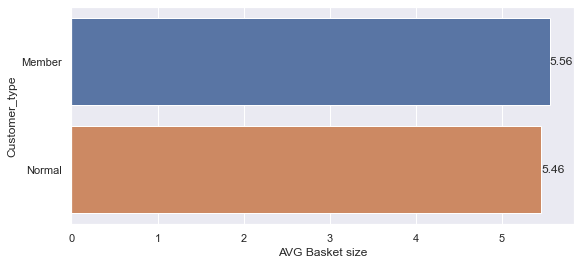

In [271]:
ctb_bar = sns.barplot(x="Quantity", y="Customer_type", data=cus_type_grp)
ctb_bar.set_xlabel("AVG Basket size")
ctb_bar.bar_label(ctb_bar.containers[0])

Kaip apsipirkimų skaičius pasiskirstęs pagal apmokėjimų būdus?

In [272]:
payment_type = df["Payment"].value_counts().reset_index()
payment_type

,index,Payment
0,Ewallet,345
1,Cash,344
2,Credit card,311


[Text(0, 0, '345'), Text(0, 0, '344'), Text(0, 0, '311')]

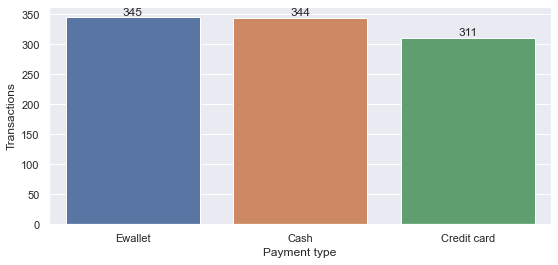

In [273]:
pt_plot = sns.countplot(x="Payment", data=df)
pt_plot.set_ylabel("Transactions")
pt_plot.set_xlabel("Payment type")
pt_plot.bar_label(pt_plot.containers[0])

Kaip pasiskirstę reitingai tarp vyrų ir moterų?

In [274]:
rate_gender = df.groupby(["Rating", "Gender"]).size()
rate_gender.unstack()

Gender,Female,Male
Rating,,
4.0,6,5
4.1,13,4
4.2,14,8
4.3,7,11
4.4,7,10
...,...,...
9.6,9,8
9.7,7,7
9.8,7,12


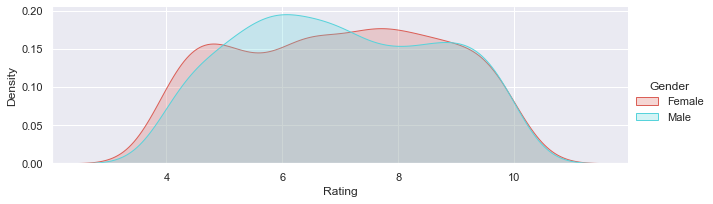

In [275]:
rbg_plot = sns.FacetGrid(data=df, hue="Gender", aspect=3, palette="hls")
rbg_plot.map(sns.kdeplot, "Rating", shade=True)
rbg_plot.add_legend()

Kaip pasiskirstę reitingai tarp narių ir ne?

In [276]:
rate_member = df.groupby(["Rating", "Customer_type"]).size()
rate_member.unstack()

Customer_type,Member,Normal
Rating,,
4.0,7,4
4.1,9,8
4.2,11,11
4.3,11,7
4.4,7,10
...,...,...
9.6,7,10
9.7,8,6
9.8,11,8


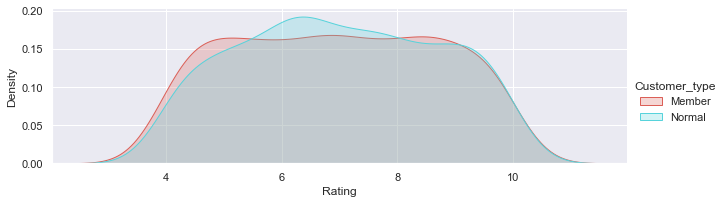

In [277]:
rct_plot = sns.FacetGrid(data=df, hue="Customer_type", aspect=3, palette="hls")
rct_plot.map(sns.kdeplot, "Rating", shade=True)
rct_plot.add_legend()

### Produktų analizė

Kurią valandą daugiausia parduodama produktų?

In [278]:
basket_size_per_hour = df.groupby("Hour")["Quantity"].mean().reset_index().round(1)
basket_size_per_hour

,Hour,Quantity
0,10,5.2
1,11,5.7
2,12,5.6
3,13,5.7
4,14,6.0
5,15,5.2
6,16,5.5
7,17,5.6
8,18,5.1
9,19,5.7


Text(0, 0.5, 'AVG Basket size')

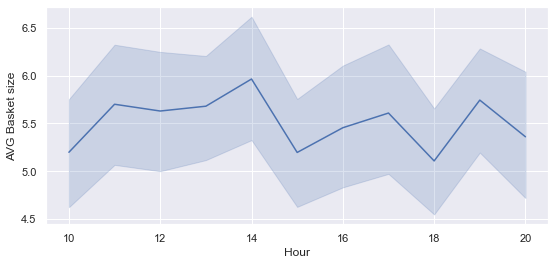

In [279]:
bsph_plot = sns.lineplot(x="Hour", y="Quantity", data=df)
bsph_plot.set_ylabel("AVG Basket size")

Kurios produktų linijos pelningiausios?

In [280]:
products_gross_margin = (
    (
        (
            df.groupby("Product_line")["gross_income"].sum()
            / df.groupby("Product_line")["sales"].sum()
        )
        * 100
    )
    .sort_values(ascending=False)
    .reset_index(name="AVG_gross_margin")
    .round(2)
)
products_gross_margin

,Product_line,AVG_gross_margin
0,Health and beauty,19.19
1,Fashion accessories,18.28
2,Home and lifestyle,16.86
3,Food and beverages,16.56
4,Electronic accessories,16.44
5,Sports and travel,15.89


[Text(0, 0, '19.19'),
 Text(0, 0, '18.28'),
 Text(0, 0, '16.86'),
 Text(0, 0, '16.56'),
 Text(0, 0, '16.44'),
 Text(0, 0, '15.89')]

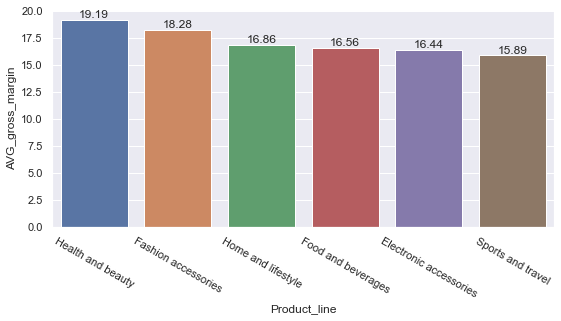

In [281]:
pgm_plot = sns.barplot(data=products_gross_margin, x="Product_line", y = 'AVG_gross_margin')
pgm_plot.set_xticklabels(pgm_plot.get_xticklabels(), rotation=330)
pgm_plot.bar_label(pgm_plot.containers[0])

### Apyvarta laiko periode

Kokie pardavimai pamėnesiui?

In [282]:
sales_by_month = df.groupby("Month")["sales"].sum().reset_index().round(0)
sales_by_month

,Month,sales
0,Feb,92590.0
1,Jan,110754.0
2,Mar,104243.0


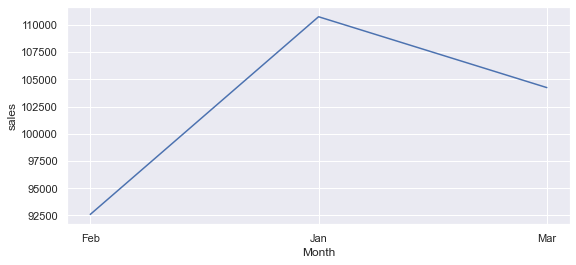

In [283]:
sbm_plot = sns.lineplot(x="Month", y="sales", data=sales_by_month)

Kokia apyvarta padieniui?

In [284]:
sales_by_date = df.groupby("Date")["sales"].sum().reset_index().round(0)
sales_by_date

,Date,sales
0,2019-01-01,4519.0
1,2019-01-02,1853.0
2,2019-01-03,1979.0
3,2019-01-04,1546.0
4,2019-01-05,3368.0
...,...,...
84,2019-03-26,1869.0
85,2019-03-27,2765.0
86,2019-03-28,2123.0
87,2019-03-29,3832.0


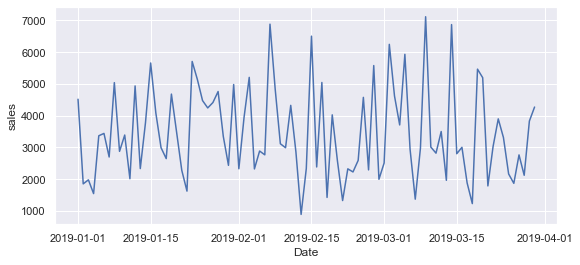

In [285]:
sbt_plot = sns.lineplot(x="Date", y="sales", data=sales_by_date)
sns.set(rc={'figure.figsize':(9,4)})

Kaip apsipirkimų skaičius pasiskirstęs per savaitės dienas?

In [286]:
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

In [287]:
sales_by_weekday = df.groupby("day_of_week")["sales"].sum().round(0).reindex(weekdays).reset_index()
sales_by_weekday

,day_of_week,sales
0,Monday,36094.0
1,Tuesday,49031.0
2,Wednesday,41649.0
3,Thursday,43190.0
4,Friday,41835.0
5,Saturday,53448.0
6,Sunday,42341.0


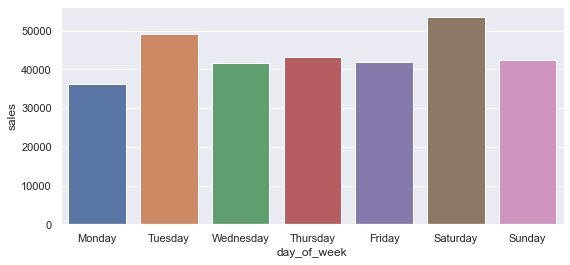

In [288]:
sbw_plot = sns.barplot(data=sales_by_weekday, x="day_of_week", y = 'sales', order=weekdays)


Kokia vid. dienos apyvarta šventinėmis ir ne dienomis?

In [289]:
# Turimų duomenų laikotarpis:
df["Date"].agg(["min", "max"])

min   2019-01-01
max   2019-03-30
Name: Date, dtype: datetime64[ns]

In [290]:
# Mianmaro šventės turimame laikotrapy:
# New year's date = 2019-01-01,
# Independence day = 2019-01-04,
# Union Day = 2019-02-12,
# Peasant's day = 2019-03-02,
# Full Moon day = 2019-03-08,
# Resistance day = 2019-03-27.
holiday = [
    "2019-01-01",
    "2019-01-04",
    "2019-02-12",
    "2019-03-02",
    "2019-03-08",
    "2019-03-27",
]

In [291]:
df["Holiday"] = np.where(df["Date"].isin(holiday), True, False)

In [292]:
sales_by_holidays = df.groupby(["Holiday"])["sales"].sum().reset_index().round()
sales_by_holidays

,Holiday,sales
0,False,286677.0
1,True,20911.0


In [293]:
holiday_days_count = df.groupby("Holiday")["Date"].nunique().reset_index().round()
holiday_days_count.columns = [
    "days" if x == "Date" else x for x in holiday_days_count.columns
]
holiday_days_count

,Holiday,days
0,False,83
1,True,6


In [294]:
holiday_days_sales = pd.merge(sales_by_holidays, holiday_days_count)
holiday_days_sales

,Holiday,sales,days
0,False,286677.0,83
1,True,20911.0,6


In [295]:
holiday_days_sales["avg_day_sales"] = (
    holiday_days_sales["sales"] / holiday_days_sales["days"]
).round()
holiday_days_sales

,Holiday,sales,days,avg_day_sales
0,False,286677.0,83,3454.0
1,True,20911.0,6,3485.0


Text(0.5, 1.0, 'Holiday/Non-holiday AVG daily sales')

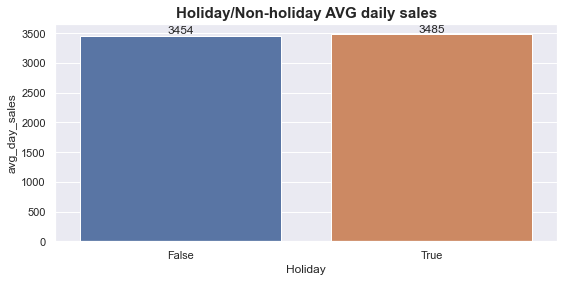

In [296]:
hds_plot = sns.barplot(x="Holiday", y="avg_day_sales", data=holiday_days_sales)
hds_plot.bar_label(hds_plot.containers[0])
hds_plot.set_title(
    "Holiday/Non-holiday AVG daily sales", fontsize=15, fontweight="bold"
)

Koks vidutinis pirkėjo krepšelis šventinėmis ir ne dienomis per produktų linijas?

In [297]:
prod_line = df[["Product_line", "Holiday", "sales"]]
products_holiday = (
    prod_line.groupby(["Product_line", "Holiday"], as_index=False).mean().round()
)
products_holiday

,Product_line,Holiday,sales
0,Electronic accessories,False,308.0
1,Electronic accessories,True,262.0
2,Fashion accessories,False,284.0
3,Fashion accessories,True,423.0
4,Food and beverages,False,310.0
5,Food and beverages,True,270.0
6,Health and beauty,False,310.0
7,Health and beauty,True,278.0
8,Home and lifestyle,False,310.0
9,Home and lifestyle,True,506.0


[Text(0.5, 0, 'Product lines'), Text(0, 0.5, 'AVG day sales')]

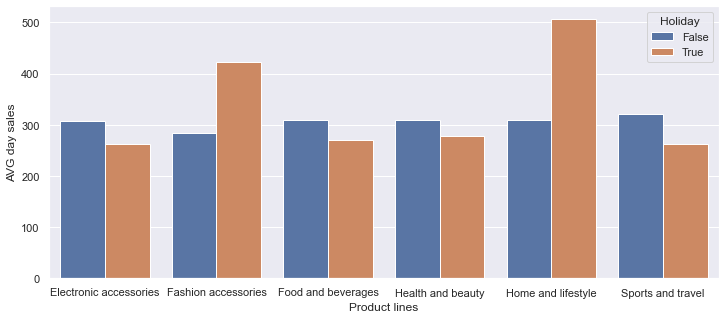

In [298]:
plt.figure(figsize=(12, 5))
ph_plot = sns.barplot(x="Product_line", y="sales", hue="Holiday", data=products_holiday)
ph_plot.set(xlabel="Product lines", ylabel="AVG day sales")

### Prekybos tinklo padalinių palyginimas

Kokie kievieno padalinio pardavimai pamėnesiui?

In [299]:
city_branch_sales_month = df.groupby(['City', 'Month'])['sales'].sum()
city_branch_sales_month.unstack()

Month,Feb,Jan,Mar
City,,,
Mandalay,32785.02,35405.77,32949.85
Naypyitaw,31366.65,38509.22,35427.66
Yangon,28438.21,36839.17,35865.83


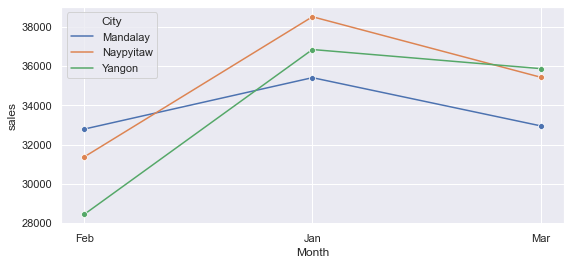

In [300]:
cbsm_plot = sns.lineplot(
    x="Month", y="sales", hue="City", marker = 'o', data=city_branch_sales_month.to_frame()
)


Koks kiekvieno padalinio vidutinis įvertinimas?

In [301]:
city_branch_rating = df.groupby("City")["Rating"].mean().round(2)
city_branch_rating

City
Mandalay     6.82
Naypyitaw    7.07
Yangon       7.03
Name: Rating, dtype: float64

[Text(0, 0, '6.82'), Text(0, 0, '7.07'), Text(0, 0, '7.03')]

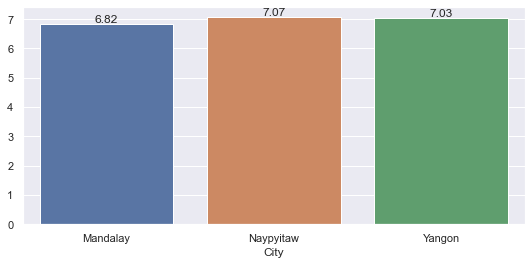

In [302]:
cbr_plot = sns.barplot(y=city_branch_rating.values, x=city_branch_rating.index)
cbr_plot.bar_label(cbr_plot.containers[0])

Kokius įvertinimus gavo kiekvienas padalinys priklausomai nuo klientų narystės?

In [303]:
branch_member_rating = df.groupby(["City", "Customer_type"]).agg({"Rating": ["min", q1, "median", q3, "max"]})
branch_member_rating

Rating                         
                           min    q1 median    q3   max
City      Customer_type                                
Mandalay  Member           4.0  5.30    6.5  8.40  10.0
          Normal           4.0  5.45    6.9  8.15  10.0
Naypyitaw Member           4.0  5.50    7.1  8.50  10.0
          Normal           4.0  5.85    7.1  8.60   9.9
Yangon    Member           4.0  5.60    7.1  8.50   9.9
          Normal           4.0  5.70    7.0  8.50  10.0

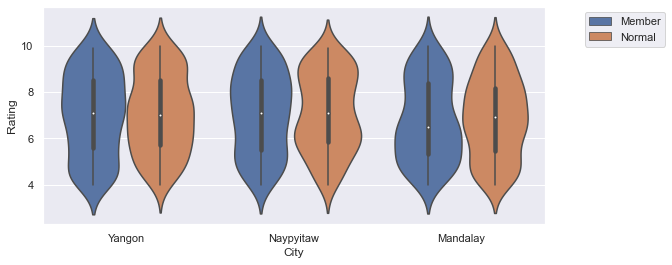

In [304]:
bmr_plot = sns.violinplot(x="City", y="Rating", data=df, hue="Customer_type")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

Kokie mokėjimo būdai populiariausi kiekviename padalinyje?

In [305]:
branch_pay_type = df.groupby(["Branch", "Payment"]).size().round(2)
branch_pay_type.unstack()

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


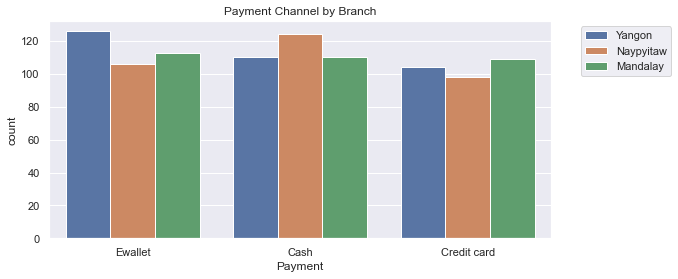

In [306]:
bpt_plot = sns.countplot(x="Payment", hue="City", data=df).set_title(
    "Payment Channel by Branch"
)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

Išvados. 
Tarp prekybos tinklo klientų moterys, kurios turi narystę, yra linkusios išleisti daugiau per vieną apsipirkimą. Tarp moterų populiariausia produktų linija – “Fashion accessories”, tarp vyrų – “Health and beauty”.
Visam tinkle populiariausias atsiskaitymo metodas – ewallet, nežymiai atsilieka atsisikaitymas grynais. Ewallet daugiausia atsiskaito Yangon mieste, grynais – Naypitaw, kreditine kortele  - Mandalay mieste.
Daugiausia produktų kiekiškai nuperkama 14h. Maržingiausia produktų linija - “Fashion accessories”, mažiausiai maržinga – “Home and lifestyle”.
Didžiausi pardavimai fiksuoti 2019 sausį. Diena su didžiausiai pardavimais – šeštadienis, mažiausiais – pirmadienis. Šventinėmis dienomis nėra pastebimi didesni vidutiniai dienos pardavimai, tačiau išauga išleidžiama pinigų suma “Home and lifestyle” produktų linijai.
Nariai yra linkę geriau vertinti apsipirkimo patirtį. Bendrai visų pirkėjų aukščiausia reitinguojamas padalinys Naypitaw mieste.
